In [8]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
df = pd.read_csv("C:\\Users\\dsadm\\Desktop\\raphael\IABD-1\\formativa\\dados_produtos.csv") #utilizo o pandas para ler o arquivo csv

In [10]:
df.head() #mostra os primeiras linhas do arquivo

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [11]:
df.info() #estou vendo as informaçoes de cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [12]:
product_name = df["product_name"]
rating = df["rating"]
rating_count = df["rating_count"]
purchased = df["purchased"]
#estou pegando cada coluna e setando um nome correspondente

Text(0, 0.5, 'Notas')

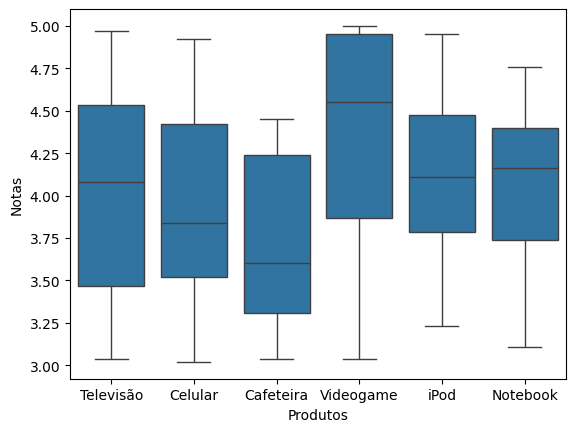

In [13]:
sns.boxplot(x=product_name, y=rating) #plotar a relação dos produtos com suas notas
plt.xlabel('Produtos')
plt.ylabel('Notas')


In [14]:
df.describe() #Mostra estatísticas descritivas

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


In [15]:
df.dropna(axis=0) #remove dados faltantes

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1
...,...,...,...,...
95,iPod,4.44,1372,0
96,Celular,4.66,1690,1
97,Televisão,4.33,3364,1
98,Notebook,3.30,1825,1


In [16]:
df_televisao = df.loc[df['product_name'] == 'Televisão']
#variáveis explanatórias (independentes)
X = df_televisao.drop(["purchased", "product_name"], axis=1)
#Variavel dependente
y = df_televisao["purchased"] 

In [17]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=10) #divisão em conjunto de treino e teste

In [18]:

modelo = DecisionTreeClassifier()
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier()

In [19]:
previsoes = modelo.predict(X_teste) #uso o modelo de teste para fazer a previsão
print(previsoes)

[1 0 1 1 0 1]


In [20]:
accuracy = accuracy_score(y_teste,previsoes)
print(accuracy)

0.6666666666666666


C:\Users\dsadm\AppData\Local\Temp\ipykernel_28572\760088452.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Comprou' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_televisao.loc[df_televisao['purchased'] == 1] = 'Comprou'
C:\Users\dsadm\AppData\Local\Temp\ipykernel_28572\760088452.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Comprou' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_televisao.loc[df_televisao['purchased'] == 1] = 'Comprou'


[Text(0.75, 0.9166666666666666, 'Comprou <= 4.965\ngini = 0.426\nsamples = 13\nvalue = [4, 9]\nclass = Comprou'),
 Text(0.625, 0.75, 'Comprou <= 4.17\ngini = 0.375\nsamples = 12\nvalue = [3, 9]\nclass = Comprou'),
 Text(0.5, 0.5833333333333334, 'Comprou <= 3.89\ngini = 0.469\nsamples = 8\nvalue = [3, 5]\nclass = Comprou'),
 Text(0.375, 0.4166666666666667, 'Comprou <= 2161.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5]\nclass = Comprou'),
 Text(0.25, 0.25, 'Comprou <= 304.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = Comprou'),
 Text(0.125, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Comprou'),
 Text(0.375, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Comprou'),
 Text(0.5, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Comprou'),
 Text(0.625, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Comprou'),
 Text(0.75, 0.5833333333333334, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Comprou'),
 Text(0.

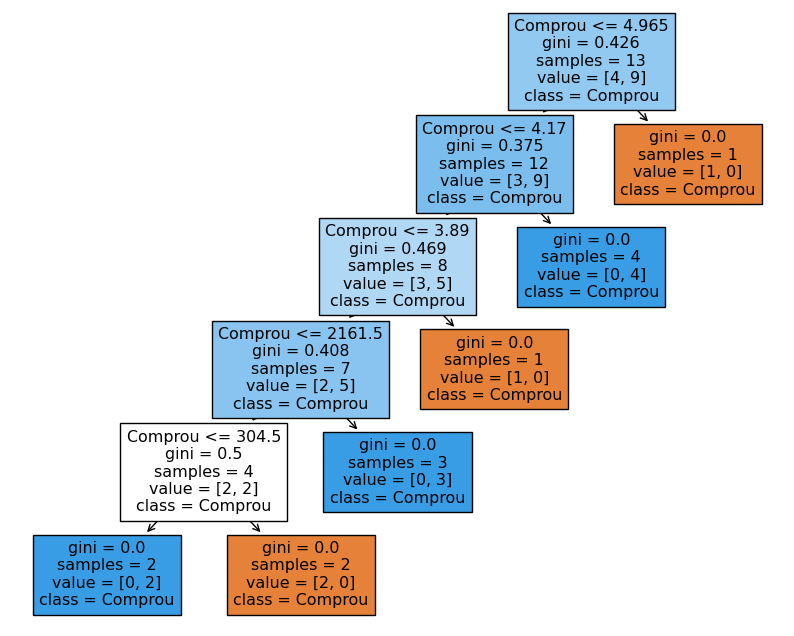

In [24]:
fig = plt.figure(figsize=(10,8))

df_televisao.loc[df_televisao['purchased'] == 1] = 'Comprou' #verifica se comprou ou não
df_televisao.loc[df_televisao['purchased'] == 0] = 'Não Comprou'

tree.plot_tree(modelo,feature_names= df_televisao['rating'].tolist(), class_names = df_televisao['purchased'].tolist(), filled= True) #ploto a arvore

In [26]:
df_celular = df.loc[df['product_name'] == 'Celular']
#variáveis explanatórias (independentes)
X = df_celular.drop(["purchased", "product_name"], axis=1)
#Variavel dependente
y = df_celular["purchased"] 

[0 1 1 0 0 1 1]
0.5714285714285714


C:\Users\dsadm\AppData\Local\Temp\ipykernel_28572\3909619473.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Comprou' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_celular.loc[df_celular['purchased'] == 1] = 'Comprou' #verifica se comprou ou não
C:\Users\dsadm\AppData\Local\Temp\ipykernel_28572\3909619473.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Comprou' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_celular.loc[df_celular['purchased'] == 1] = 'Comprou' #verifica se comprou ou não


[Text(0.6, 0.9166666666666666, 'Não Comprou <= 3688.5\ngini = 0.49\nsamples = 14\nvalue = [8, 6]\nclass = Não Comprou'),
 Text(0.4, 0.75, 'Não Comprou <= 3.885\ngini = 0.48\nsamples = 10\nvalue = [4, 6]\nclass = Não Comprou'),
 Text(0.2, 0.5833333333333334, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Não Comprou'),
 Text(0.6, 0.5833333333333334, 'Não Comprou <= 3213.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = Não Comprou'),
 Text(0.4, 0.4166666666666667, 'Não Comprou <= 4.155\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = Não Comprou'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Não Comprou'),
 Text(0.6, 0.25, 'Não Comprou <= 2124.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = Não Comprou'),
 Text(0.4, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Não Comprou'),
 Text(0.8, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Não Comprou'),
 Text(0.8, 0.4166666666666667, 'gini = 0.0\nsamples = 

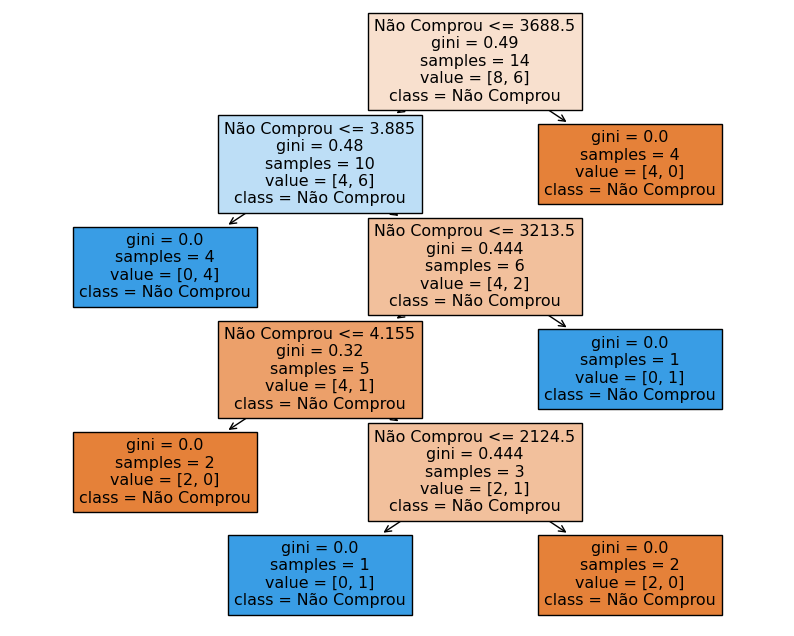

In [27]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=11) #divisão em conjunto de treino e teste

modelo = DecisionTreeClassifier()
modelo.fit(X_treino, y_treino)

previsoes = modelo.predict(X_teste) #uso o modelo de teste para fazer a previsão
print(previsoes)

accuracy = accuracy_score(y_teste,previsoes)
print(accuracy)


fig = plt.figure(figsize=(10,8))

df_celular.loc[df_celular['purchased'] == 1] = 'Comprou' #verifica se comprou ou não
df_celular.loc[df_celular['purchased'] == 0] = 'Não Comprou'

tree.plot_tree(modelo,feature_names= df_celular['rating'].tolist(), class_names = df_celular['purchased'].tolist(), filled= True) #ploto a arvore

[0 0 0]
0.6666666666666666


C:\Users\dsadm\AppData\Local\Temp\ipykernel_28572\379047475.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Comprou' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_cafeteira.loc[df_cafeteira['purchased'] == 1] = 'Comprou' #verifica se comprou ou não
C:\Users\dsadm\AppData\Local\Temp\ipykernel_28572\379047475.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Comprou' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cafeteira.loc[df_cafeteira['purchased'] == 1] = 'Comprou' #verifica se comprou ou não


[Text(0.4, 0.8333333333333334, 'Comprou <= 3650.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = Não Comprou'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Não Comprou'),
 Text(0.6, 0.5, 'Não Comprou <= 3.32\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Comprou'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Não Comprou'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Comprou')]

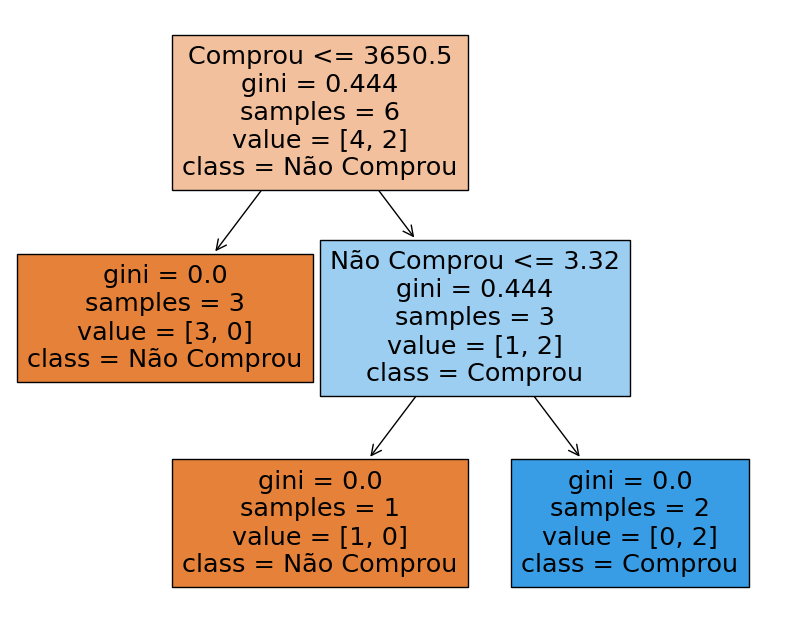

In [28]:
df_cafeteira = df.loc[df['product_name'] == 'Cafeteira']
#variáveis explanatórias (independentes)
X = df_cafeteira.drop(["purchased", "product_name"], axis=1)
#Variavel dependente
y = df_cafeteira["purchased"]

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=12) #divisão em conjunto de treino e teste

modelo = DecisionTreeClassifier()
modelo.fit(X_treino, y_treino)

previsoes = modelo.predict(X_teste) #uso o modelo de teste para fazer a previsão
print(previsoes)

accuracy = accuracy_score(y_teste,previsoes)
print(accuracy)


fig = plt.figure(figsize=(10,8))

df_cafeteira.loc[df_cafeteira['purchased'] == 1] = 'Comprou' #verifica se comprou ou não
df_cafeteira.loc[df_cafeteira['purchased'] == 0] = 'Não Comprou'

tree.plot_tree(modelo,feature_names= df_cafeteira['rating'].tolist(), class_names = df_cafeteira['purchased'].tolist(), filled= True) #ploto a arvore 

[0 1 1 1 1 1]
0.5


C:\Users\dsadm\AppData\Local\Temp\ipykernel_28572\2469674782.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Comprou' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_Videogame.loc[df_Videogame['purchased'] == 1] = 'Comprou' #verifica se comprou ou não
C:\Users\dsadm\AppData\Local\Temp\ipykernel_28572\2469674782.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Comprou' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_Videogame.loc[df_Videogame['purchased'] == 1] = 'Comprou' #verifica se comprou ou não


[Text(0.25, 0.9166666666666666, 'Comprou <= 3.39\ngini = 0.463\nsamples = 11\nvalue = [4, 7]\nclass = Comprou'),
 Text(0.125, 0.75, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Comprou'),
 Text(0.375, 0.75, 'Comprou <= 4.61\ngini = 0.346\nsamples = 9\nvalue = [2, 7]\nclass = Comprou'),
 Text(0.25, 0.5833333333333334, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = Comprou'),
 Text(0.5, 0.5833333333333334, 'Comprou <= 4.725\ngini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = Comprou'),
 Text(0.375, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Comprou'),
 Text(0.625, 0.4166666666666667, 'Comprou <= 1951.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Comprou'),
 Text(0.5, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Comprou'),
 Text(0.75, 0.25, 'Comprou <= 3464.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Comprou'),
 Text(0.625, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Comprou'),
 Text(0.875, 0.0833333333

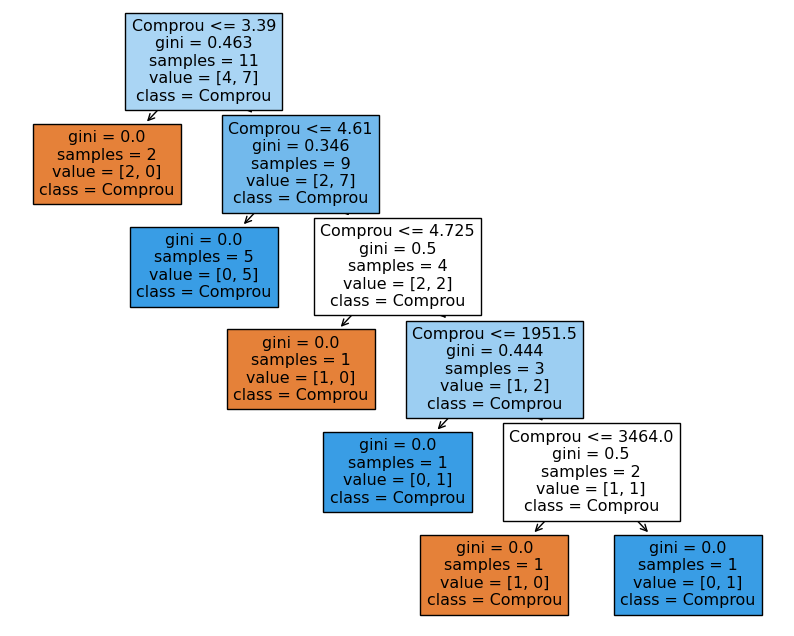

In [29]:
df_Videogame = df.loc[df['product_name'] == 'Videogame']
#variáveis explanatórias (independentes)
X = df_Videogame.drop(["purchased", "product_name"], axis=1)
#Variavel dependente
y = df_Videogame["purchased"]

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=12) #divisão em conjunto de treino e teste

modelo = DecisionTreeClassifier()
modelo.fit(X_treino, y_treino)

previsoes = modelo.predict(X_teste) #uso o modelo de teste para fazer a previsão
print(previsoes)

accuracy = accuracy_score(y_teste,previsoes)
print(accuracy)


fig = plt.figure(figsize=(10,8))

df_Videogame.loc[df_Videogame['purchased'] == 1] = 'Comprou' #verifica se comprou ou não
df_Videogame.loc[df_Videogame['purchased'] == 0] = 'Não Comprou'

tree.plot_tree(modelo,feature_names= df_Videogame['rating'].tolist(), class_names = df_Videogame['purchased'].tolist(), filled= True) #ploto a arvore 

[1 0 1 0 0 0]
0.5


C:\Users\dsadm\AppData\Local\Temp\ipykernel_28572\609503636.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Comprou' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_iPod.loc[df_iPod['purchased'] == 1] = 'Comprou' #verifica se comprou ou não
C:\Users\dsadm\AppData\Local\Temp\ipykernel_28572\609503636.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Comprou' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_iPod.loc[df_iPod['purchased'] == 1] = 'Comprou' #verifica se comprou ou não


[Text(0.5555555555555556, 0.875, 'Não Comprou <= 4.11\ngini = 0.486\nsamples = 12\nvalue = [7, 5]\nclass = Não Comprou'),
 Text(0.3333333333333333, 0.625, 'Não Comprou <= 3.77\ngini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Comprou'),
 Text(0.2222222222222222, 0.375, 'Não Comprou <= 3.365\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = Não Comprou'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Comprou'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Não Comprou'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Comprou'),
 Text(0.7777777777777778, 0.625, 'Comprou <= 244.0\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = Não Comprou'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Comprou'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Não Comprou')]

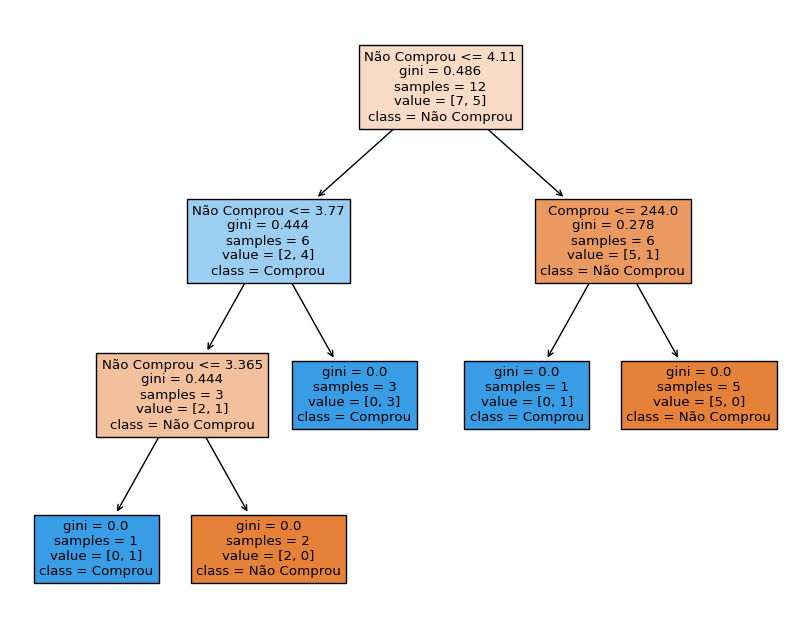

In [31]:

df_iPod = df.loc[df['product_name'] == 'iPod']
#variáveis explanatórias (independentes)
X = df_iPod.drop(["purchased", "product_name"], axis=1)
#Variavel dependente
y = df_iPod["purchased"]

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=12) #divisão em conjunto de treino e teste

modelo = DecisionTreeClassifier()
modelo.fit(X_treino, y_treino)

previsoes = modelo.predict(X_teste) #uso o modelo de teste para fazer a previsão
print(previsoes)

accuracy = accuracy_score(y_teste,previsoes)
print(accuracy)


fig = plt.figure(figsize=(10,8))

df_iPod.loc[df_iPod['purchased'] == 1] = 'Comprou' #verifica se comprou ou não
df_iPod.loc[df_iPod['purchased'] == 0] = 'Não Comprou'

tree.plot_tree(modelo,feature_names= df_iPod['rating'].tolist(), class_names = df_iPod['purchased'].tolist(), filled= True) #ploto a arvore 

[1 1 1 1 1]
0.4


C:\Users\dsadm\AppData\Local\Temp\ipykernel_28572\473385637.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Comprou' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_Notebook.loc[df_Notebook['purchased'] == 1] = 'Comprou' #verifica se comprou ou não
C:\Users\dsadm\AppData\Local\Temp\ipykernel_28572\473385637.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Comprou' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_Notebook.loc[df_Notebook['purchased'] == 1] = 'Comprou' #verifica se comprou ou não


[Text(0.5555555555555556, 0.9, 'Não Comprou <= 4.685\ngini = 0.463\nsamples = 11\nvalue = [4, 7]\nclass = Comprou'),
 Text(0.4444444444444444, 0.7, 'Não Comprou <= 3.84\ngini = 0.42\nsamples = 10\nvalue = [3, 7]\nclass = Comprou'),
 Text(0.2222222222222222, 0.5, 'Não Comprou <= 3.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = Não Comprou'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Comprou'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Não Comprou'),
 Text(0.6666666666666666, 0.5, 'Não Comprou <= 4.34\ngini = 0.245\nsamples = 7\nvalue = [1, 6]\nclass = Comprou'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Comprou'),
 Text(0.7777777777777778, 0.3, 'Não Comprou <= 4.385\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Comprou'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Não Comprou'),
 Text(0.8888888888888888, 0.1, 'gini = 0.0\

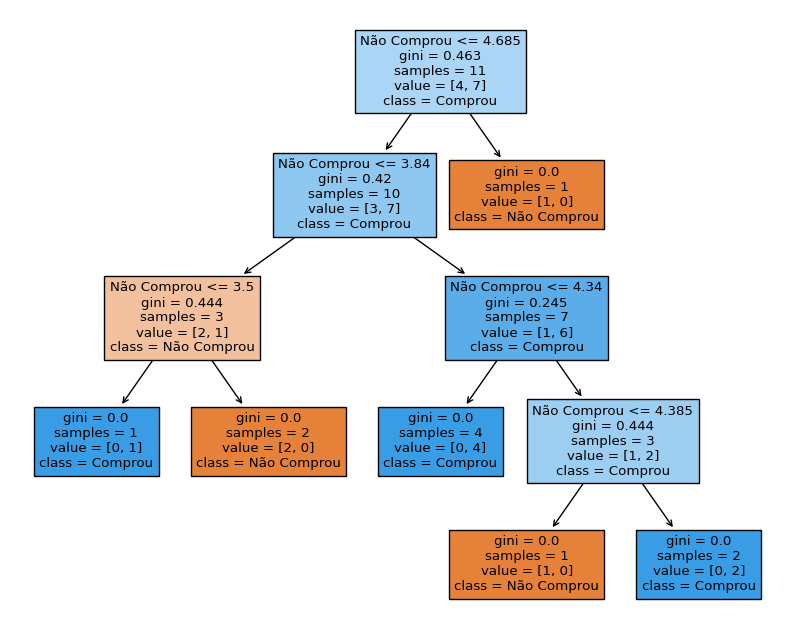

In [32]:

df_Notebook = df.loc[df['product_name'] == 'Notebook']
#variáveis explanatórias (independentes)
X = df_Notebook.drop(["purchased", "product_name"], axis=1)
#Variavel dependente
y = df_Notebook["purchased"]

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=12) #divisão em conjunto de treino e teste

modelo = DecisionTreeClassifier()
modelo.fit(X_treino, y_treino)

previsoes = modelo.predict(X_teste) #uso o modelo de teste para fazer a previsão
print(previsoes)

accuracy = accuracy_score(y_teste,previsoes)
print(accuracy)


fig = plt.figure(figsize=(10,8))

df_Notebook.loc[df_Notebook['purchased'] == 1] = 'Comprou' #verifica se comprou ou não
df_Notebook.loc[df_Notebook['purchased'] == 0] = 'Não Comprou'

tree.plot_tree(modelo,feature_names= df_Notebook['rating'].tolist(), class_names = df_Notebook['purchased'].tolist(), filled= True) #ploto a arvore 